Connected to Python 3.11.6

In [1]:
import numpy as np 
import pandas as pd 
import  matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression 

In [2]:
df = pd.read_csv('payment_fraud.csv')
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0


In [3]:
df.isnull().sum()

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
label                   0
dtype: int64

label
0    38661
1      560
Name: count, dtype: int64

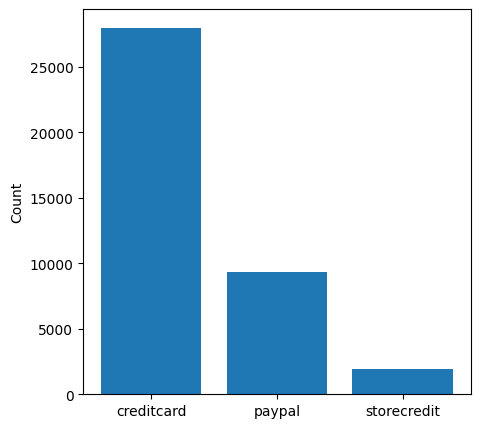

In [4]:
paymthd = df.paymentMethod.value_counts()
plt.figure(figsize=(5, 5))
plt.bar(paymthd.index,paymthd)
plt.ylabel('Count')
df.label.value_counts()

In [5]:
# paymthd_label = {v:k for k, v in enumerate(df.paymentMethod.unique())}
paymthd_label, unique_values = pd.factorize(df.paymentMethod)
df.paymentMethod =paymthd_label
print(df.head())

   accountAgeDays  numItems  localTime  paymentMethod  paymentMethodAgeDays  \
0              29         1   4.745402              0             28.204861   
1             725         1   4.742303              1              0.000000   
2             845         1   4.921318              2              0.000000   
3             503         1   4.886641              2              0.000000   
4            2000         1   5.040929              2              0.000000   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  


In [6]:
print(df.describe())
corr = df.corr()
corr.style.background_gradient()

       accountAgeDays      numItems     localTime  paymentMethod  \
count    39221.000000  39221.000000  39221.000000   39221.000000   
mean       857.563984      1.084751      4.748232       1.476811   
std        804.788212      0.566899      0.389360       0.850805   
min          1.000000      1.000000      0.421214       0.000000   
25%         72.000000      1.000000      4.742303       1.000000   
50%        603.000000      1.000000      4.886641       2.000000   
75%       1804.000000      1.000000      4.962055       2.000000   
max       2000.000000     29.000000      5.040929       2.000000   

       paymentMethodAgeDays         label  
count          39221.000000  39221.000000  
mean             122.641326      0.014278  
std              283.569177      0.118636  
min                0.000000      0.000000  
25%                0.000000      0.000000  
50%                0.012500      0.000000  
75%               87.510417      0.000000  
max             1999.580556      1.

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
accountAgeDays,1.000000,-0.037562,-0.012600,0.004047,0.330909,-0.128098
numItems,-0.037562,1.000000,-0.042563,0.004762,0.031683,0.038116
localTime,-0.012600,-0.042563,1.000000,0.001568,-0.033076,-0.059505
paymentMethod,0.004047,0.004762,0.001568,1.000000,0.001731,0.003533
paymentMethodAgeDays,0.330909,0.031683,-0.033076,0.001731,1.000000,-0.052047
label,-0.128098,0.038116,-0.059505,0.003533,-0.052047,1.000000


In [7]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
sc = StandardScaler()
X = sc.fit_transform(x)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
# print("X_train shape: ", x_train.shape)
# print("X_test shape: ", x_test.shape)
# print("y_train shape: ", y_train.shape)
# print("y_test shape: ", y_test.shape)

In [9]:
lg = LogisticRegression()
lg.fit(x_train, y_train)

LogisticRegression()

In [10]:
pred = lg.predict(x_test)
print("accuracy score:- " ,accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

accuracy score:-  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9664
           1       1.00      1.00      1.00       142

    accuracy                           1.00      9806
   macro avg       1.00      1.00      1.00      9806
weighted avg       1.00      1.00      1.00      9806

